# Example 2: Occultation light curves and fits

In [1]:
%matplotlib inline

In [2]:
# Import packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from lmfit.models import LinearModel, StepModel, RectangleModel

In [3]:
# Set plot size
plt.rcParams["figure.figsize"] = (16,6)

In [4]:
# Plot settings: title
occ_title = "Occultation lightcurve for site: Paradise Rest Camp, Namibia (T50-cm, Observer: M. Kretlow)"

In [5]:
# Read data from CSV file (generated with PYOTE)
data = np.genfromtxt('OLC_MKretlow_OTE.csv',dtype=None, encoding=None, delimiter=',', comments='#', skip_header=2,
                     usecols = (0,1,2), names=['frame', 'time', 'value' ],)

In [6]:
# Get number of frames in the CSV file
num_of_images = len(data['frame'])
print("Number of frames / images = ",num_of_images)

Number of frames / images =  2032


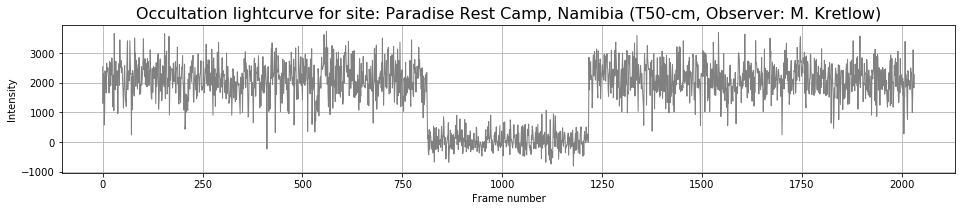

In [7]:
# 1st Plot: raw occultation light curve
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(data['frame'], data['value'], color='gray', linestyle='-', linewidth=1, marker='')
ax1.grid()
ax1.set_xlabel("Frame number")
ax1.set_ylabel("Intensity")
plt.title(occ_title,fontsize=16);

In [8]:
# Normalize the occultation light curve

# Define 'outside occultation' region points
l1,l2,r1,r2 = 50,750,1250,2000

xall = data['frame']
yall = data['value']

# Normalize signal using region outside occultation (trim here left and right region)
y_outside = np.concatenate((yall[l1:l2],yall[r1:r2]), axis=0)
yall = data['value'] / np.mean(y_outside)

print("# frames in outside region = ",len(y_outside), ", mean = ",np.mean(y_outside))

# frames in outside region =  1450 , mean =  2142.316924957931


In [9]:
# Slice dataset for the fit (for example just D or R region using step model)
x = xall #[800:2000]
y = yall #[800:2000]

In [10]:
# Fit the model function (well-depth) to the light curve

step_mod = RectangleModel(form='atan', prefix='step_')
line_mod = LinearModel(prefix='line_')

pars = line_mod.make_params(intercept=y.min(), slope=0)
#pars += step_mod.guess(yy, x=x, center=800)
pars += step_mod.guess(y, x=x) #, center1=800,center2=1200)

mod = step_mod + line_mod
out = mod.fit(y, pars, x=x)

# The errors here reported are 1-sigma errors estimates from the covariance matrix of the LS fit
print(out.fit_report())

[[Model]]
    (Model(rectangle, prefix='step_', form='atan') + Model(linear, prefix='line_'))
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 292
    # data points      = 2032
    # variables        = 7
    chi-square         = 121.189761
    reduced chi-square = 0.05984680
    Akaike info crit   = -5715.05781
    Bayesian info crit = -5675.74038
[[Variables]]
    line_slope:     -2.6298e-06 +/- 9.2671e-06 (352.39%) (init = 0)
    line_intercept:  1.00167922 +/- 0.01122247 (1.12%) (init = -0.3762282)
    step_amplitude: -0.97645174 +/- 0.01419833 (1.45%) (init = 2.120912)
    step_center1:    812.062101 +/- 0.23394510 (0.03%) (init = 507.75)
    step_sigma1:     0.14333769 +/- 0.44418524 (309.89%) (init = 290.1429)
    step_center2:    1216.00038 +/- 0.36659147 (0.03%) (init = 1523.25)
    step_sigma2:     4.7334e-04 +/- 0.44369523 (93736.48%) (init = 290.1429)
    step_midpoint:   1014.03124 +/- 0.22061726 (0.02%) == '(step_center1+step_center2)/2.0'
[[Cor

In [11]:
# The lmfit confidence module allows you to explicitly calculate confidence intervals for variable parameters. For 
# most models, it is not necessary since the estimation of the standard error from the estimated covariance matrix 
# is normally quite good.
# But for some models, the sum of two exponentials for example, the approximation begins to fail. 
# For this case, lmfit has the function conf_interval() to calculate confidence intervals directly. 
# This is substantially slower than using the errors estimated from the covariance matrix, 
# but the results are more robust.

# out.conf_interval()
# print(out.ci_report())

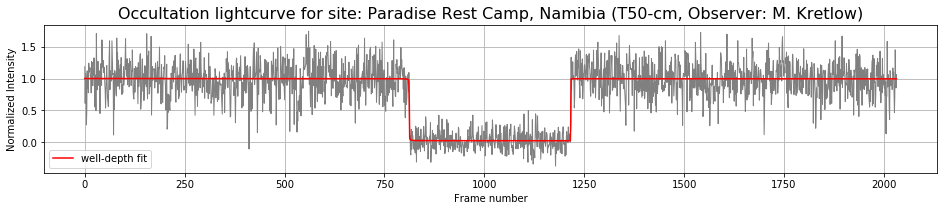

In [12]:
# Plot light curve together with well-depth fit
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.plot(x, y, color='gray', linestyle='-', linewidth=1, marker='')
ax1.grid()
ax1.plot(x, out.best_fit, 'r-', label='well-depth fit')
ax1.set_xlabel("Frame number")
ax1.set_ylabel("Normalized Intensity")
ax1.legend(loc='best')
plt.title(occ_title,fontsize=16);

In [13]:
# Get frame number of disappearance (D) and reappearance (R), which can be converted to times
print(out.params['step_center1'])
print(out.params['step_center2'])

<Parameter 'step_center1', value=812.0621012136145 +/- 0.234, bounds=[-inf:inf]>
<Parameter 'step_center2', value=1216.0003838355685 +/- 0.367, bounds=[-inf:inf]>
